In [19]:
%pip install cryptography

     ---------------------------------------- 2.6/2.6 MB 20.8 MB/s eta 0:00:00
     ------------------------------------- 179.1/179.1 kB 11.3 MB/s eta 0:00:00
     -------------------------------------- 118.7/118.7 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install Flask-Bootstrap


     -------------------------------------- 456.4/456.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Flask-Bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460142 sha256=57557c0eb56114be20e12fba139feaf0f41d30ea522ac4882003ad06d4ffa434
  Stored in directory: c:\users\harsh\appdata\local\pip\cache\wheels\6f\33\ad\26540e84a28334e5dfeda756df270f95353779f03bc5cf40d4
  Created wheel for visitor: filename=visitor-0.1.3-py3-none-any.whl size=3951 sha256=a3949bd79701d78b4ad7740ea4647c602ac31bf64d3f30c1167f94665f368851
  Stored in directory: c:\users\harsh\appdata\local\pip\cache\wheels\19\31\99\2ec5b4459cac4d801d6201d501a354366d180afc9f8bb2d333
Successfully built Flask-Bootstrap visitor


In [38]:
%pip install flask

     ---------------------------------------- 96.9/96.9 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
%pip install cmake

     --------------------------------------- 33.0/33.0 MB 14.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
%pip install dlib

  Using cached dlib-19.24.1.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
Failed to build dlib
  Running setup.py install for dlib: started
  Running setup.py install for dlib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [68 lines of output]
      running bdist_wheel
      running build
      running build_py
      running build_ext
      C:\Users\harsh\AppData\Local\Temp\pip-install-nhfpf879\dlib_2b8691cb027546e0964172a837748d5a\setup.py:129: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        if LooseVersion(cmake_version) < '3.1.0':
      Building extension for Python 3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]
      Invoking CMake setup: 'cmake C:\Users\harsh\AppData\Local\Temp\pip-install-nhfpf879\dlib_2b8691cb027546e0964172a837748d5a\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\harsh\AppData\Local\Temp\pip-install-nhfpf879\dlib_2b8691cb027546e0964172a837748d5a\build\lib.win-amd64-cpython-310 -DPYTHON_EXECUTABLE=c:\Users\harsh\anaconda3\envs\tfdml_plugin\python.exe -D

In [34]:
%pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import csv
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.applications import ResNet50V2
import tensorflow as tf
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd
from PIL import Image
from keras_vggface.vggface import VGGFace

In [2]:
import tensorflow as tf

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

### Read the Dataset

In [3]:
# Load dataset
data = pd.read_csv('.\Data\data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206 entries, 0 to 4205
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4206 non-null   int64  
 1   bmi          4206 non-null   float64
 2   gender       4206 non-null   object 
 3   is_training  4206 non-null   int64  
 4   name         4206 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 164.4+ KB


In [5]:
data.head()

,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [6]:
data.gender = data.gender.map({'Male':1, 'Female':0})

In [7]:
data.head()

,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,1,1,img_0.bmp
1,1,26.453720,1,1,img_1.bmp
2,2,34.967561,0,1,img_2.bmp
3,3,22.044766,0,1,img_3.bmp
4,4,37.758789,0,1,img_4.bmp


In [8]:
train_data = data[data['is_training']==1].reset_index(drop=True)
test_data = data[data['is_training']==0].reset_index(drop=True)

### Train and test data generator

In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.5,
    rotation_range=90,
    brightness_range=[0.2,1.0],
    horizontal_flip=True,
    validation_split=0.2
)

In [10]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='.\Data\Images',
    x_col="name",
    y_col='bmi',
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(224,224),
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='.\Data\Images',
    x_col="name",
    y_col='bmi',
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(224,224),
)

test_generator = datagen.flow_from_dataframe(
    dataframe = test_data,
    directory = '.\Data\Images',
    x_col = 'name',
    y_col = 'bmi',
    target_size = (224,224),
    batch_size = 32,
    class_mode ='raw')

Found 2568 validated image filenames.
Found 642 validated image filenames.
Found 752 validated image filenames.


c:\Users\harsh\anaconda3\envs\tfdml_plugin\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 158 invalid image filename(s) in x_col="name". These filename(s) will be ignored.
  warnings.warn(
c:\Users\harsh\anaconda3\envs\tfdml_plugin\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 158 invalid image filename(s) in x_col="name". These filename(s) will be ignored.
  warnings.warn(
c:\Users\harsh\anaconda3\envs\tfdml_plugin\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 86 invalid image filename(s) in x_col="name". These filename(s) will be ignored.
  warnings.warn(


In [1]:
from keras.applications import ResNet50V2

rs50 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze all the layers
for layer in resnet_50_model.layers:
    layer.trainable = False

94668760/94668760 [==============================] - 3s 0us/step


NameError: name 'resnet_50_model' is not defined

In [ ]:
for layer in resnet_50_model.layers[-5:]:
    layer.trainable = True

In [15]:
# plot_model(resnet_50_model, show_shapes=True)

In [14]:
# vgg_face_model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3))
# # Freeze all the layers
# for layer in vgg_face_model.layers:
#     layer.trainable = False

In [15]:
# for layer in vgg_face_model.layers[-22:]:
#     layer.trainable = True

In [16]:
# plot_model(vgg_face_model, show_shapes=True)

In [17]:
# %pip install keras-vggface

In [18]:
# %pip install keras_applications

In [19]:
# vgg_model = tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))
# # Freeze all the layers
# for layer in vgg_model.layers:
#     layer.trainable = False

# # Unfreeze the first two convolutional layers in the first block and the first convolutional layer in the second block
# for layer in vgg_model.layers:
#     if 'block1_conv1' in layer.name:
#         layer.trainable = True
#     elif 'block1_conv2' in layer.name:
#         layer.trainable = True
#     elif 'block1_pool' in layer.name:
#         layer.trainable = True
#     elif 'block2_conv1' in layer.name:
#         layer.trainable = True
#     elif 'block2_conv2' in layer.name:
#         layer.trainable = True
#     elif 'block2_pool' in layer.name:
#         layer.trainable = True
#     elif 'block3_conv1' in layer.name:
#         layer.trainable = True

In [13]:
model = Sequential()
model.add(resnet_50_model)
model.add(Conv2D(padding='same', kernel_size=(2,2), filters=32, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(padding='same', kernel_size=(3,3), strides=2, filters=64, activation='relu'))
model.add(Flatten())
model.add(Dense(units = 1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=1, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 32)          262176    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1024)              263168    
                                                        

In [13]:
# model = Sequential()
# model.add(vgg_face_model)
# model.add(Conv2D(padding='same', kernel_size=(2,2), filters=32, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Conv2D(padding='same', kernel_size=(2,2), filters=64, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Flatten())
# model.add(Dense(units = 1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=512, activation='linear'))
# model.add(Dropout(0.5))
# model.add(Dense(units=64, activation='linear'))
# model.add(Dense(units=1, activation='relu'))
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vggface_resnet50 (Functiona  (None, 1, 1, 2048)       23561152  
 l)                                                              
                                                                 
 conv2d (Conv2D)             (None, 1, 1, 32)          262176    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                        

In [14]:
# model = Sequential()
# model.add(vgg_face_model)
# model.add(Flatten())
# model.add(Dense(units = 1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=512, activation='linear'))
# model.add(Dropout(0.5))
# model.add(Dense(units=64, activation='linear'))
# model.add(Dense(units=1, activation='relu'))
# model.summary()

In [15]:
# model = Sequential()
# model.add(vgg_face_model)
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=64, activation='linear'))
# model.add(Dense(units=1, activation='linear'))
# model.summary()

In [16]:
sgd = SGD(learning_rate=0.001)

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics='mse')

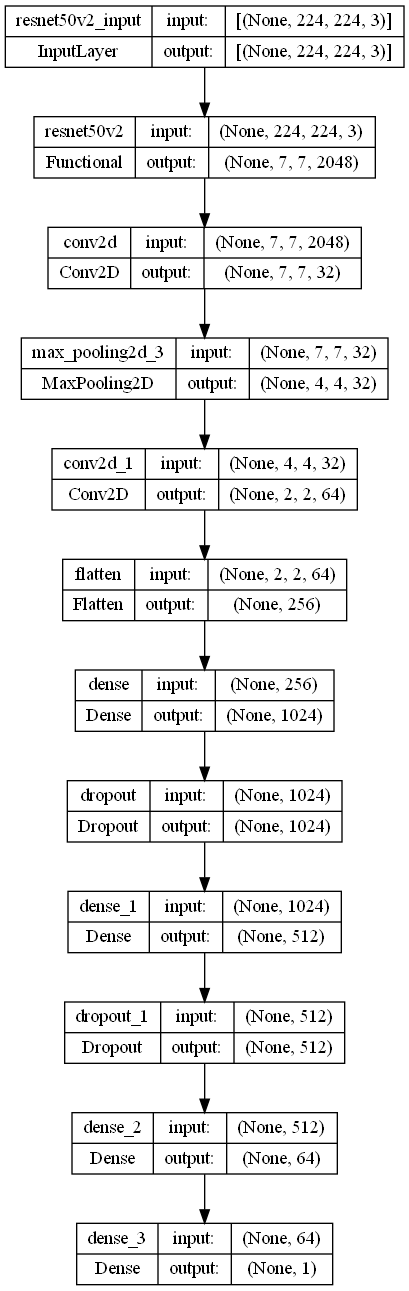

In [15]:
plot_model(model=model, show_shapes=True)

In [16]:
class PrintShapesCallback(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        x, y = self.validation_data[0], self.validation_data[1]
        y_pred = self.model.predict(x)
        print("Input shape:", x.shape)
        print("Output shape:", y_pred.shape)

In [ ]:
shapes_callback = PrintShapesCallback()

For model 2 opened only 3 layers
For model 3 its 13 layers

In [16]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='.\\Model\\resent50v3\\model4.h5',
                                                          save_best_only=True,
                                                          save_weights_only=False,
                                                          monitor='val_loss',
                                                          verbose=1,
                                                          mode='min')

In [19]:
import json

In [20]:
class SaveWeightsAndConfig(tf.keras.callbacks.Callback):
    def __init__(self, weights_filepath, config_filepath):
        self.weights_filepath = weights_filepath
        self.config_filepath = config_filepath

    def on_epoch_end(self, epoch, logs=None):
        self.model.save_weights(self.weights_filepath)
        with open(self.config_filepath, 'w') as config_file:
            config_file.write(self.model.to_json())
        if logs is not None:
            improvement = logs.get('val_loss_previous', float('inf')) - logs.get('val_loss')
            print(f"Epoch {epoch + 1}: val_loss improved from {logs.get('val_loss_previous', 'N/A'):.5f} to {logs.get('val_loss'):.5f}, saving model to {self.weights_filepath}")
            logs['val_loss_previous'] = logs.get('val_loss')

save_weights_and_config_callback = SaveWeightsAndConfig('.//Model//vgg_face//Weights//model.h5','.//Model//vgg_face//Confg//model.json')


In [17]:
model.fit(train_generator, 
          validation_data=valid_generator, 
          validation_batch_size=48,
          verbose=1,
          epochs=50,
          steps_per_epoch=len(train_generator),
          validation_steps=len(valid_generator),
          callbacks=[checkpoint_callback])

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 189.6295 - mse: 189.6295
Epoch 1: val_loss improved from inf to 72.39545, saving model to .\Model\resent50v3\model4.h5
81/81 [==============================] - 26s 290ms/step - loss: 189.6295 - mse: 189.6295 - val_loss: 72.3955 - val_mse: 72.3955
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 85.1410 - mse: 85.1410
Epoch 2: val_loss did not improve from 72.39545
81/81 [==============================] - 23s 283ms/step - loss: 85.1410 - mse: 85.1410 - val_loss: 78.1943 - val_mse: 78.1943
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 76.4749 - mse: 76.4749
Epoch 3: val_loss improved from 72.39545 to 68.36720, saving model to .\Model\resent50v3\model4.h5
81/81 [==============================] - 23s 283ms/step - loss: 76.4749 - mse: 76.4749 - val_loss: 68.3672 - val_mse: 68.3672
Epoch 4/50
81/81 [==============================] - ETA: 0s - loss: 71.2509 - mse: 71.2509
Epoch 4: val_

In [22]:
pred = model.predict(test_generator)

24/24 [==============================] - 15s 597ms/step


In [30]:
import matplotlib.pyplot as plt

In [23]:
model.evaluate(test_generator)

24/24 [==============================] - 6s 234ms/step - loss: 85.2140 - mse: 85.2140


[85.21395111083984, 85.21395111083984]

In [23]:
pred

array([[27.11454 ],
       [29.14495 ],
       [34.979908],
       [29.656628],
       [53.83227 ],
       [27.396296],
       [30.276138],
       [26.723154],
       [25.449192],
       [41.257797],
       [45.5132  ],
       [28.690126],
       [39.23163 ],
       [24.13364 ],
       [28.475777],
       [40.15448 ],
       [33.549843],
       [29.130226],
       [29.598034],
       [25.214836],
       [23.144827],
       [28.470161],
       [22.13925 ],
       [30.904472],
       [24.099045],
       [28.647419],
       [24.937328],
       [33.20587 ],
       [28.36277 ],
       [29.852297],
       [34.714428],
       [39.256714],
       [31.92116 ],
       [24.859585],
       [29.852531],
       [32.2482  ],
       [30.423618],
       [28.559933],
       [31.96307 ],
       [29.403898],
       [22.763672],
       [25.797533],
       [39.095417],
       [31.681713],
       [34.730003],
       [31.990915],
       [32.560165],
       [32.25383 ],
       [27.42802 ],
       [24.583584],
